## Code required to create Figure 1
Entire notebook takes: ~20 seconds on Intel i7-10750 using > 4GB RAM

In [1]:
import datetime
import numpy as np
import pandas as pd
import xarray as xr
from statsmodels.tsa.stattools import adfuller ## Augmented Dickey-Fuller test for non-stationarity in time series
## Plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
START_YEAR = "1979"
END_YEAR = "2022"

In [3]:
era_npac_day_dict = {}

era_npac_day_dict['Woollings2010_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_ERA5_daily_outputs/Woollings et al. 2010 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
era_npac_day_dict['BarnesPolvani2013_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_ERA5_daily_outputs/Barnes & Polvani 2013 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
era_npac_day_dict['BarnesPolvani2015_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_ERA5_daily_outputs/Barnes & Polvani 2015 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
era_npac_day_dict['BarnesSimpson2017_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_ERA5_daily_outputs/Barnes & Simpson 2017 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
era_npac_day_dict['GrisePolvani2017_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_ERA5_daily_outputs/Grise & Polvani 2017 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
era_npac_day_dict['Bracegirdle2018_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_ERA5_daily_outputs/Bracegirdle et al. 2018 North Pacific.csv', index_col='year')
era_npac_day_dict['Ceppi2018_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_ERA5_daily_outputs/Ceppi et al. 2018 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
era_npac_day_dict['Kerr2020_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_ERA5_daily_outputs/Kerr et al. 2020 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]


In [4]:
b18_data = pd.DataFrame([pd.date_range('1959', periods=64, freq='AS'),\
                         era_npac_day_dict['Bracegirdle2018_NorthPacific']['annual_JPOS'],
                        ]).T
b18_data.columns = ['time', 'annual_JPOS']
b18_data = b18_data.set_index('time')
b18_data = b18_data[START_YEAR:END_YEAR]

In [5]:
## Note Kerr et al. 2020 is lon mean
metric_data = pd.DataFrame(era_npac_day_dict['Woollings2010_NorthPacific']['jet_lat'])
metric_data = metric_data.rename(columns={'jet_lat':'jet_lat_w10'})
metric_data = pd.concat([metric_data, pd.DataFrame(era_npac_day_dict['BarnesPolvani2013_NorthPacific']['jet_lat'])], axis=1)
metric_data = metric_data.rename(columns={'jet_lat':'jet_lat_bp13'})
metric_data = pd.concat([metric_data, pd.DataFrame(era_npac_day_dict['BarnesPolvani2015_NorthPacific']['jet_lat'])], axis=1)
metric_data = metric_data.rename(columns={'jet_lat':'jet_lat_bp15'})
metric_data = pd.concat([metric_data, pd.DataFrame(era_npac_day_dict['BarnesSimpson2017_NorthPacific']['jet_lat'])], axis=1)
metric_data = metric_data.rename(columns={'jet_lat':'jet_lat_bs17'})
metric_data = pd.concat([metric_data, pd.DataFrame(era_npac_day_dict['GrisePolvani2017_NorthPacific']['jet_lat'])], axis=1)
metric_data = metric_data.rename(columns={'jet_lat':'jet_lat_gp17'})
# metric_data = pd.concat([metric_data, b18_data], axis=1)
# metric_data = metric_data.rename(columns={'jet_lat':'jet_lat_b18'})
metric_data = pd.concat([metric_data, pd.DataFrame(era_npac_day_dict['Ceppi2018_NorthPacific']['jet_lat'])], axis=1)
metric_data = metric_data.rename(columns={'jet_lat':'jet_lat_c18'})
metric_data = pd.concat([metric_data, pd.DataFrame(era_npac_day_dict['Kerr2020_NorthPacific']['jet_lat'])], axis=1)
metric_data = metric_data.rename(columns={'jet_lat':'jet_lat_k20'})


In [6]:
metric_data.index = pd.to_datetime(metric_data.index)

In [7]:
metric_data = pd.concat([metric_data, b18_data], axis=1)
metric_data = metric_data.rename(columns={'jet_lat':'jet_lat_b18'})

In [8]:
metric_data['annual_JPOS'] = metric_data['annual_JPOS'].astype(float)

In [9]:
PDO_data = pd.read_csv('data/PacificDecadalOscillation.csv', skiprows=11, header=None, sep='\s\s')
PDO_data.columns = ['time', 'pdo'] 
PDO_data['time'] = PDO_data['time'].apply(lambda t: datetime.datetime.strptime(str(t), '%Y%m%d'))
PDO_data = PDO_data.set_index('time')
PDO_data = PDO_data.loc["1979":]

/tmp/ipykernel_24407/2520827410.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  PDO_data = pd.read_csv('data/PacificDecadalOscillation.csv', skiprows=11, header=None, sep='\s\s')


In [10]:
MSLP_data = xr.open_dataset('data/era5_mslp_79to21_NH_monthly.nc')
MSLP_data = MSLP_data.drop_vars('expver')
MSLP_data = MSLP_data.sel(time=slice("1979", None))

In [11]:
npac_mslp = MSLP_data.sel(latitude=slice(90, 0), longitude=slice(120, 240))

In [12]:
t2m_data = xr.open_dataset('../../Climate Data/ERA-5/era_mon_temp_40to23.nc')
t2m_data = t2m_data.sel(time=slice("1979", None))

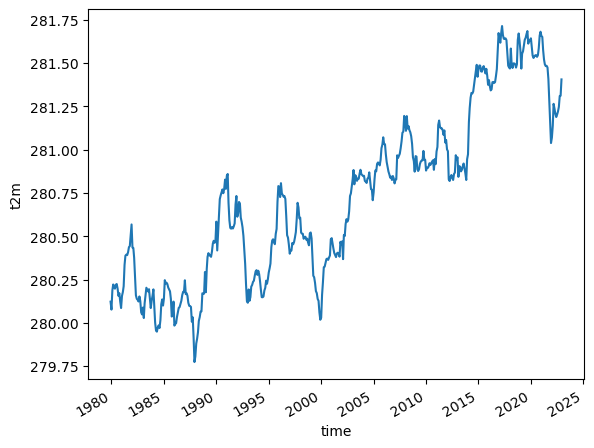

In [13]:
npac_t2m_mean = t2m_data.sel(latitude=slice(90, 0), longitude=slice(120, 240))['t2m'].mean(('latitude', 'longitude'))
npac_t2m_mean.rolling(time=12).mean().plot()

### Make mean sea level pressure and t2m gradient calculations

In [14]:
npac_temp = t2m_data.sel(latitude=slice(90, 0), longitude=slice(120, 240))
npac_temp['t2m_mean_poleward_grad'] = (('time'),\
                                       np.array(list(map(lambda row: np.mean(np.gradient(row)), npac_temp.mean('longitude')['t2m']))))

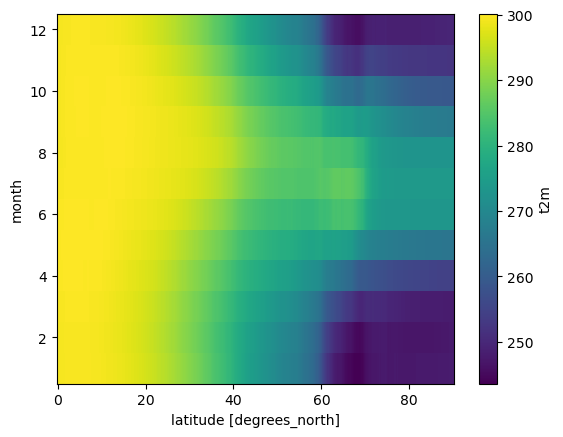

In [15]:
npac_temp.mean('longitude').groupby('time.month').mean()['t2m'].plot()

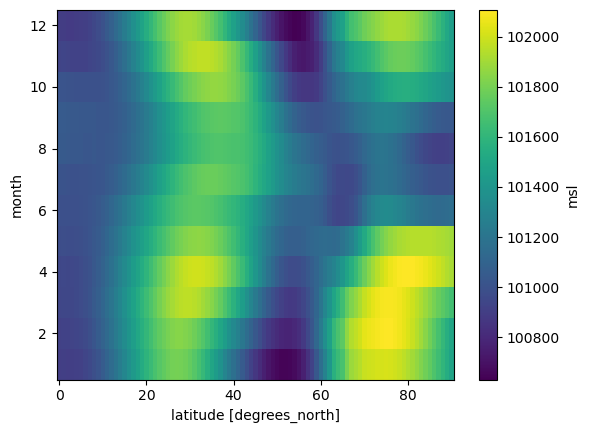

In [16]:
npac_mslp.mean('longitude').groupby('time.month').mean()['msl'].plot()

In [17]:
npac_mslp = npac_mslp.sortby('latitude', ascending=True)
data = npac_mslp.mean('longitude')['msl'].groupby('time.month').mean().sel(month=5)

In [18]:
def get_crossover_points(data, backup_first_index=20, backup_second_index=45, backup_third_index=70):
    assert len(data.dims) == 1, "this method only works when there is one dimension: latitude"
    data_mean = data.mean()
    first_index = get_first_index(data, data_mean)
    
    try:
        second_index = get_nth_index(data, data_mean, first_index)
    except IndexError:
        second_index = backup_second_index
        
    try:
        third_index = get_nth_index(data, data_mean, second_index, func=np.greater)
    except IndexError:
        third_index = backup_third_index

    if first_index >= second_index or first_index >= third_index:
        first_index = backup_first_index
        
    if second_index >= third_index:
        second_index = backup_second_index 
        third_index = backup_third_index
        
    return first_index, second_index, third_index

def get_first_index(data, data_mean):
    return np.where(data - data_mean > 0)[0][0]

def get_nth_index(data, data_mean, previous_index, func=np.less):
    return previous_index + np.where(func(data[previous_index:] - data_mean, 0))[0][0]


def get_msl_peak_and_trough(data, first_index, second_index, third_index):
    peak = data.sel(latitude=slice(first_index, second_index))
    trough = data.sel(latitude=slice(second_index, third_index))
    peak_lat = peak['latitude'][np.where(peak == peak.max())[0][0]]
    trough_lat = trough['latitude'][np.where(trough == trough.min())[0][0]]
    return peak_lat, trough_lat


def get_msl_low_and_high(data, first_index, second_index, third_index, num_vals_to_include=3):
    """
    Method to get top 3 and bottom 3 msl values in peak and trough
    """
    subtrop_msl_high = sorted(data.sel(latitude=slice(first_index, second_index)).data, reverse=True)[:num_vals_to_include]
    mid_lat_msl_low = sorted(data.sel(latitude=slice(second_index, third_index)).data, reverse=False)[:num_vals_to_include]
    return subtrop_msl_high, mid_lat_msl_low


## Metrics for gradient calculation
def calc_mean_peak_trough_gradient(data,  first_index, second_index, third_index):
    peak_lat, trough_lat = get_msl_peak_and_trough(data,  first_index, second_index, third_index)
    return np.mean(np.gradient(data.sel(latitude=slice(peak_lat,trough_lat))))


def calc_difference_in_msl(data, first_index, second_index, third_index):
    subtrop_msl_high, mid_lat_msl_low = get_msl_low_and_high(data, first_index, second_index, third_index)
    return subtrop_msl_high - mid_lat_msl_low


def run_msl_gradient_metric(data, grad_func=calc_mean_peak_trough_gradient):
    try:
        first_index, second_index, third_index = get_crossover_points(data)
    except IndexError:
        return np.nan
    return grad_func(data,  first_index, second_index, third_index)
    


In [19]:
first_index, second_index, third_index = get_crossover_points(data)
subtrop_msl_high, mid_lat_msl_low = get_msl_low_and_high(data, first_index, second_index, third_index)
print(np.mean(subtrop_msl_high) - np.mean(mid_lat_msl_low))
peak_lat, trough_lat = get_msl_peak_and_trough(data, first_index, second_index, third_index)
print(float(peak_lat), float(trough_lat))
print("mean gradient", np.mean(np.gradient(data.sel(latitude=slice(peak_lat,trough_lat)))))
# 20 44 70
# 774.8125
# 32.0 54.0
# mean gradient -33.962635

780.15625
32.0 54.0
mean gradient -34.200577


Text(52, 101010, 'mid lat low')

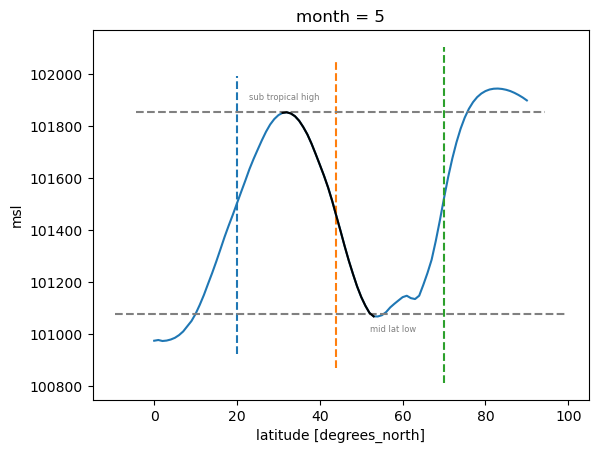

In [20]:
data.plot()
plt.vlines(data['latitude'][first_index], plt.gca().axes.get_ylim()[0], plt.gca().axes.get_ylim()[1], 'C0', '--')
plt.vlines(data['latitude'][second_index], plt.gca().axes.get_ylim()[0], plt.gca().axes.get_ylim()[1], 'C1', '--')
plt.vlines(data['latitude'][third_index], plt.gca().axes.get_ylim()[0], plt.gca().axes.get_ylim()[1], 'C2', '--')
plt.hlines(101853, plt.gca().axes.get_xlim()[0], plt.gca().axes.get_xlim()[1], 'grey', '--')
plt.hlines(101080, plt.gca().axes.get_xlim()[0], plt.gca().axes.get_xlim()[1], 'grey', '--')
data.sel(latitude=slice(31, 53)).plot(c='k')
plt.text(s="sub tropical high", x=23, y=101900, c='grey', fontsize=6)
plt.text(s="mid lat low", x=52, y=101010, c='grey', fontsize=6)

In [21]:
%%time
npac_mslp['msl_hightolow_mean_grad'] = (('time'), np.array(list(map(run_msl_gradient_metric, npac_mslp.mean('longitude')['msl']))))

CPU times: user 3.39 s, sys: 4.58 ms, total: 3.39 s
Wall time: 3.39 s


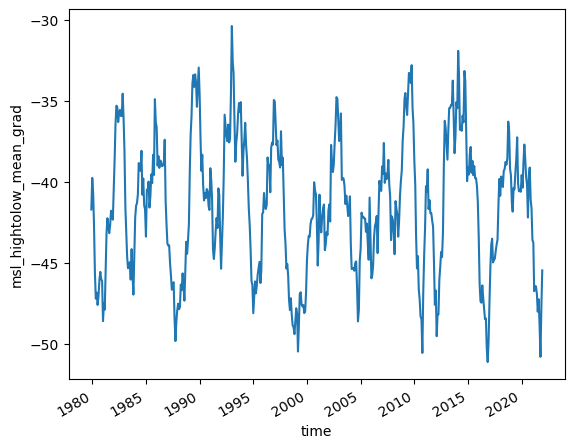

In [22]:
# npac_mslp['msl'].mean(('longitude', 'latitude')).rolling({'time':12}).mean().plot(c='C1')
# ax2 = plt.gca().twinx()
npac_mslp['msl_hightolow_mean_grad'].rolling({'time':12}).mean().plot(c='C0')

# Make Figure 1

In [23]:
clim_data = PDO_data.join(npac_mslp['msl_hightolow_mean_grad'].to_dataframe())
clim_data = clim_data.join(npac_t2m_mean.to_dataframe())
clim_data['temp_anom'] = (clim_data['t2m'] - clim_data['t2m'].mean())
clim_data = clim_data.join(npac_temp['t2m_mean_poleward_grad'].to_dataframe())
all_data = pd.concat([clim_data, metric_data], axis=1)

In [24]:
def get_linear_reg_slope(data, col_name):
    lin_reg_data = prepare_data_for_linear_reg(data, col_name)
    return linear_reg_slope(lin_reg_data)


def prepare_data_for_linear_reg(data, col_name):
    values = data[col_name].values.astype(float)
    ordinal_dates = get_ordinal_dates(data)
    lin_reg_data = pd.DataFrame([values, ordinal_dates]).T
    lin_reg_data = lin_reg_data.dropna()
    return lin_reg_data


def get_ordinal_dates(data, index_col_name='time'):
    return pd.to_datetime(data.reset_index()[index_col_name]).apply(lambda date: date.toordinal())


def linear_reg_slope(data):
    """
        data[0] should be values, data[1] should be ordinal dates
    """
    slope, intercept = np.polyfit(data[1], data[0], 1)
    lr1d = np.poly1d([slope, intercept])(data[1])
    return pd.DataFrame(lr1d, index=data[1].apply(lambda row: pd.to_datetime(datetime.date.fromordinal(int(row)))), columns=['reg_line'])

In [25]:
all_data_1m_resampled = all_data.resample('1m').mean()

In [60]:
## Get Correlation

In [138]:
from scipy.stats import kendalltau

In [157]:
for col in all_data_1m_resampled.columns:
    print(col, 'msl', kendalltau(all_data_1m_resampled['msl_hightolow_mean_grad'].fillna(0.0), all_data_1m_resampled[col].fillna(0.0)))
    print(col, 'pdo', kendalltau(all_data_1m_resampled['pdo'].fillna(0.0), all_data_1m_resampled[col].fillna(0.0)))
    print(col, 'tan', kendalltau(all_data_1m_resampled['temp_anom'].fillna(0.0), all_data_1m_resampled[col].fillna(0.0)))
    print(col, 'tg', kendalltau(all_data_1m_resampled['t2m_mean_poleward_grad'].fillna(0.0), all_data_1m_resampled[col].fillna(0.0)))

pdo msl SignificanceResult(statistic=-0.022989390667844715, pvalue=0.43520386699392544)
pdo pdo SignificanceResult(statistic=1.0, pvalue=7.568121144257509e-252)
pdo tan SignificanceResult(statistic=-0.010120737629083826, pvalue=0.7312048192774118)
pdo tg SignificanceResult(statistic=0.022613992387834188, pvalue=0.44273925083691534)
msl_hightolow_mean_grad msl SignificanceResult(statistic=1.0, pvalue=3.2552218943976256e-253)
msl_hightolow_mean_grad pdo SignificanceResult(statistic=-0.02298939066784472, pvalue=0.43520386699392544)
msl_hightolow_mean_grad tan SignificanceResult(statistic=0.3632737523992323, pvalue=5.03998692095877e-35)
msl_hightolow_mean_grad tg SignificanceResult(statistic=-0.37637955854126687, pvalue=1.8008368926970165e-37)
t2m msl SignificanceResult(statistic=0.3440049184261037, pvalue=1.3950146249514727e-31)
t2m pdo SignificanceResult(statistic=-0.005390719300951178, pvalue=0.8548179689284068)
t2m tan SignificanceResult(statistic=0.9807311660268715, pvalue=1.245500992

In [139]:
kendalltau

<function scipy.stats._stats_py.kendalltau(x, y, initial_lexsort=None, nan_policy='propagate', method='auto', variant='b', alternative='two-sided')>

In [61]:
kendall_corr_set = all_data_1m_resampled.drop(['jet_lat_bp15', 'annual_JPOS'], axis=1).corr('kendall')
kendall_corr_set = kendall_corr_set[kendall_corr_set != 1]

In [26]:
WINDOW_SIZE = 12 # 12 months

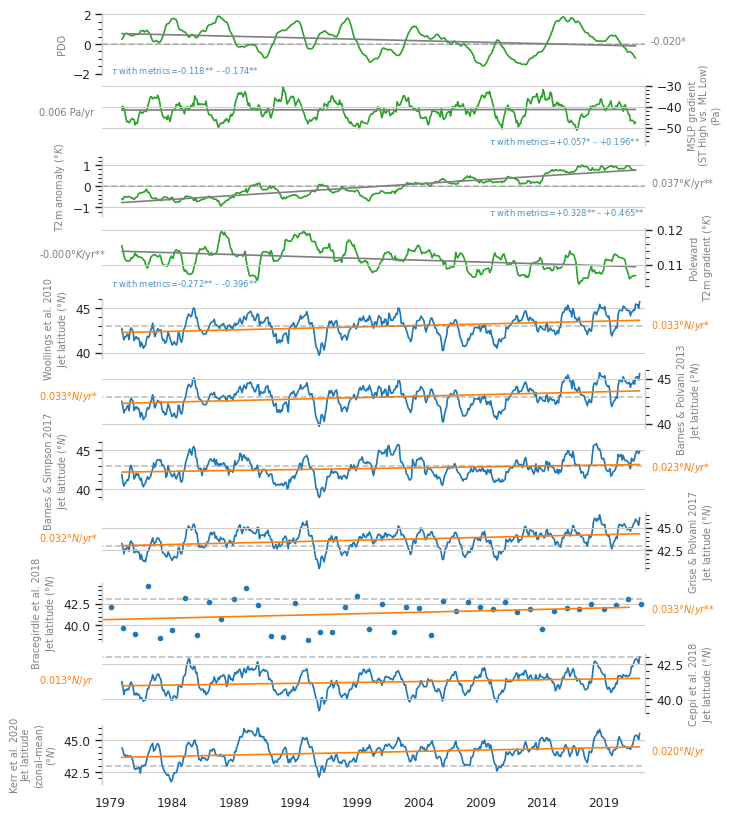

In [166]:
sns.set_style('whitegrid')
sns.set_context('paper')
fig, axes = plt.subplots(11, 1, figsize=(7, 10), sharex=True, \
                         height_ratios=[0.5, 0.5, 0.5,0.5, 0.5, 0.5, 0.5, 0.5,0.5, 0.5, 0.5])
# all_data_rolling = all_data.rolling(window=365).mean()
# all_data_rolling_missing_vals = all_data.rolling(window=365, min_periods=8).mean()
# all_data_rolling['temp_anom'] = (all_data_rolling['t2m'] - all_data_rolling['t2m'].mean())
cols_to_plot = ['pdo', 'msl_hightolow_mean_grad', 'temp_anom', 't2m_mean_poleward_grad',\
                'jet_lat_w10', 'jet_lat_bp13', 'jet_lat_bs17',\
                'jet_lat_gp17', 'annual_JPOS', 'jet_lat_c18', 'jet_lat_k20'] #'jet_lat_bp15',

ylabels = ["PDO", "MSLP gradient\n(ST High vs. ML Low)\n(Pa)", "T2m anomaly (${\degree K}$)", "Poleward\nT2m gradient (${\degree K}$)",\
           "Woollings et al. 2010\nJet latitude (${\degree N}$)",\
           "Barnes & Polvani 2013\nJet latitude (${\degree N}$)",\
           "Barnes & Simpson 2017\nJet latitude (${\degree N}$)",\
           "Grise & Polvani 2017\nJet latitude (${\degree N}$)",\
          "Bracegirdle et al. 2018\nJet latitude (${\degree N}$)",\
           "Ceppi et al. 2018\nJet latitude (${\degree N}$)",\
          "Kerr et al. 2020\nJet latitude\n(zonal-mean)\n(${\degree N}$)"]

slope_units = ["", " Pa/yr", "${\degree K}$/yr", "${\degree K}$/yr"]

all_data_1m_resampled['pdo'].rolling(window=WINDOW_SIZE).mean().plot(ax=axes[0], c='C2')
axes[0].set_ylim(-2, 2)
axes[0].hlines(0, 100, 648, alpha=.5, color='grey', linestyle='--')
all_data_1m_resampled['msl_hightolow_mean_grad'].rolling(window=WINDOW_SIZE).mean().plot(ax=axes[1], c='C2')
axes[1].set_ylim(-58, -30)
all_data_1m_resampled['temp_anom'].rolling(window=WINDOW_SIZE).mean().plot(ax=axes[2], c='C2')
axes[2].set_ylim(-1.4, 1.4)
axes[2].hlines(0, 100, 648, alpha=.5, color='grey', linestyle='--')
all_data_1m_resampled['t2m_mean_poleward_grad'].rolling(window=WINDOW_SIZE).mean().plot(ax=axes[3], c='C2')
all_data_1m_resampled['jet_lat_w10'].rolling(window=WINDOW_SIZE).mean().plot(ax=axes[4], c="C0")
all_data_1m_resampled['jet_lat_bp13'].rolling(window=WINDOW_SIZE).mean().plot(ax=axes[5], c="C0")
# all_data_1m_resampled['jet_lat_bp15'].rolling(window=WINDOW_SIZE).mean().plot(ax=axes[6], c="C0")
all_data_1m_resampled['jet_lat_bs17'].rolling(window=WINDOW_SIZE).mean().plot(ax=axes[6], c="C0")
all_data_1m_resampled['jet_lat_gp17'].rolling(window=WINDOW_SIZE).mean().plot(ax=axes[7], c="C0")
all_data_1m_resampled['annual_JPOS'].plot(ax=axes[8], marker='o', markersize=3, c="C0")
all_data_1m_resampled['jet_lat_c18'].rolling(window=WINDOW_SIZE).mean().plot(ax=axes[9], c="C0")
# axes[10].set_ylim(26, 42)
all_data_1m_resampled['jet_lat_k20'].rolling(window=WINDOW_SIZE).mean().plot(ax=axes[10], c="C0")

counter = 0 
for ax, col_name, ylabel in zip(axes, cols_to_plot, ylabels):
    if counter % 2 == 1:
        twin_ax = ax.twinx()
        twin_ax.set_ylim(ax.get_ylim())
        twin_ax.spines['top'].set_visible(False) 
        twin_ax.spines['bottom'].set_visible(False)
        twin_ax.spines['left'].set_visible(False)
        ax.spines['left'].set_visible(False)
        twin_ax.set_ylabel(ylabel, size=7, color='grey')
        twin_ax.minorticks_on()
        twin_ax.tick_params(axis='y',which='major', right=True)
        twin_ax.tick_params(axis='y',which='minor', right=True)
        twin_ax.hlines(43, 0, 680, color='gray', alpha=0.5, linestyle='--')
        ax.set_yticks([])
    else:
        ax.set_ylabel(ylabel, size=7, color='grey'); 
    
    ax.spines['top'].set_visible(False); 
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False); 
    ax.set_title('')
    if col_name == "annual_JPOS":
        color_to_use = 'C1'
        lin_reg_line = get_linear_reg_slope(pd.DataFrame(all_data_1m_resampled[col_name]), col_name)
        lin_reg_line.plot(ax=ax, c=color_to_use, legend=False)
    elif col_name in cols_to_plot[:4]:
        color_to_use = 'C7'
        # Work around because first columns are monthly res
        lin_reg_line = get_linear_reg_slope(pd.DataFrame(all_data_1m_resampled[col_name].rolling(window=WINDOW_SIZE).mean()), col_name)
        lin_reg_line.plot(ax=ax, c=color_to_use, legend=False)
    else:
        color_to_use = 'C1'
        # try:
        #     lin_reg_line = get_linear_reg_slope(all_data_rolling, col_name)
        # except:
        lin_reg_line = get_linear_reg_slope(pd.DataFrame(all_data_1m_resampled[col_name].rolling(window=WINDOW_SIZE).mean()), col_name)
        lin_reg_line.plot(ax=ax, c='C1', legend=False)
    # if counter == 4:
    #     break
    slope_by_year = (lin_reg_line['reg_line'][-1] - lin_reg_line['reg_line'][0]) / (lin_reg_line.index.year[-1]  - lin_reg_line.index.year[0])
    if counter < 4:
        slope_label = slope_units[counter]
    else:
        slope_label = "${\degree N/yr}$"
        
    ## run Augmented Dickey Fuller
    if col_name == 'annual_JPOS':
        ADF, pval, _, _, _, _ = adfuller(all_data_1m_resampled[col_name].dropna())
    elif col_name in cols_to_plot[:4]:
        ADF, pval, _, _, _, _ = adfuller(all_data_1m_resampled[col_name].rolling(window=WINDOW_SIZE).mean().dropna())
    else:
        ADF, pval, _, _, _, _ = adfuller(all_data_1m_resampled[col_name].rolling(window=WINDOW_SIZE).mean().dropna())

    if pval >= 0.05:
        slope_label += "*"
    if pval >= 0.01:
        slope_label += "*"
    else:
        pass
    if counter % 2 == 1:
        ymin, ymax = twin_ax.get_ylim()
        twin_ax.text(s=f"{slope_by_year:.3f}{slope_label}", x=twin_ax.get_xlim()[0]-70, y=(ymin + ymax)/2, fontsize=7, c=color_to_use)
    else:
        ymin, ymax = ax.get_ylim()
        ax.text(s=f"{slope_by_year:.3f}{slope_label}", x=ax.get_xlim()[-1]+10, y=(ymin + ymax)/2, fontsize=7, c=color_to_use)
        
    ax.grid(axis='x')
    ax.minorticks_on()
    ax.tick_params(axis='y',which='major', left=True)
    ax.tick_params(axis='y',which='minor', left=True)
    counter += 1

for n in range(0, 4):
    xmin, xmax = axes[n].get_xlim()
    ymin, ymax = axes[n].get_ylim()
    tau_min, tau_max = round(kendall_corr_set[cols_to_plot[n]].iloc[5:].min(), 3), round(kendall_corr_set[cols_to_plot[n]].iloc[5:].max(), 3) 
    if abs(tau_min) > abs(tau_max):
        axes[n].text(s=r"$\tau$ with metrics="+f"{tau_max}** – {tau_min}**", x=xmin, y=ymin, fontsize=6, c='C0', alpha=.8)
    else:
        asterixs = "**"
        if n == 1:
            asterixs = "*"
        axes[n].text(s=r"$\tau$ with metrics="+f"+{tau_min}{asterixs} – +{tau_max}**", x=xmax-(xmax//4.2), y=ymin, fontsize=6, c='C0', alpha=.8)
    
for n in range(4, 11):
    if n % 2 != 1:
        axes[n].hlines(43, 0, 680, color='gray', alpha=0.5, linestyle='--')

for ax in axes:
    ax.set_xlim(100, 628)
    
axes[-1].set_xlabel("")
fig.subplots_adjust(hspace=0.2)
# fig.savefig('figures/figure_1_noBP15with_tau.png', dpi=300, bbox_inches='tight', transparent=False)

<Axes: >

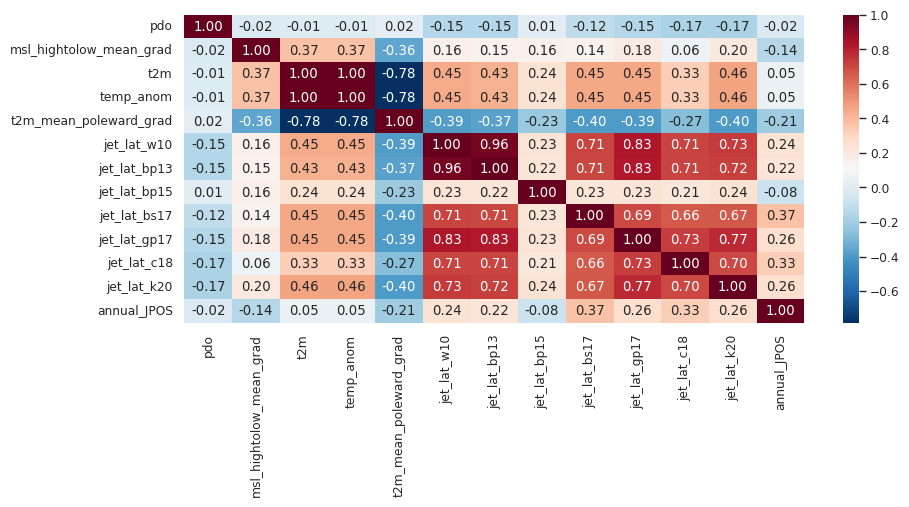

In [50]:
fig, ax = plt.subplots(1, figsize=(10, 4))
sns.heatmap(all_data_1m_resampled.corr('kendall'), cmap='RdBu_r',  annot=True, fmt='.2f')

## DJF alternative plot

<Axes: xlabel='time'>

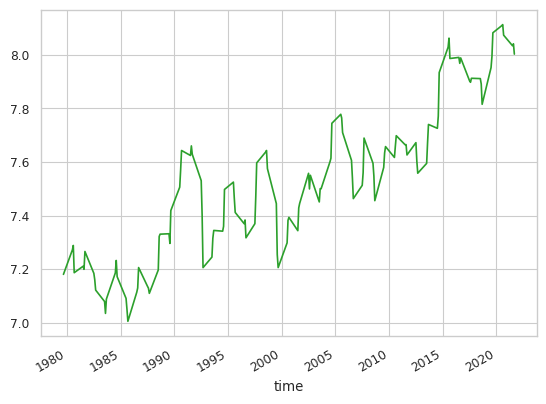

In [28]:
all_data_1m_resampled['temp_anom'].loc[(all_data_1m_resampled['temp_anom'].index.month.isin([6, 7, 8]))].rolling(window=3).mean().dropna().plot( c='C2')


<Axes: xlabel='time'>

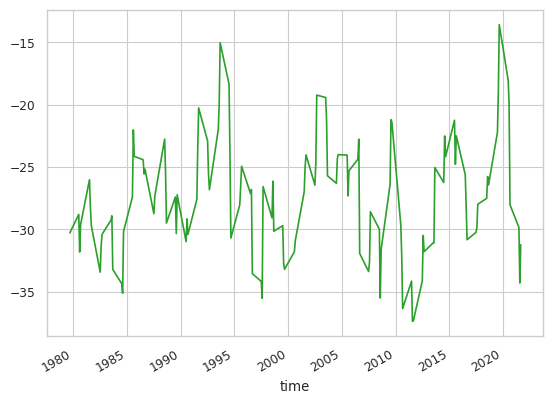

In [29]:
all_data_1m_resampled['msl_hightolow_mean_grad'].loc[(all_data_1m_resampled['msl_hightolow_mean_grad'].index.month.isin([6, 7, 8]))].rolling(window=3).mean().dropna().plot( c='C2')


<Axes: xlabel='time'>

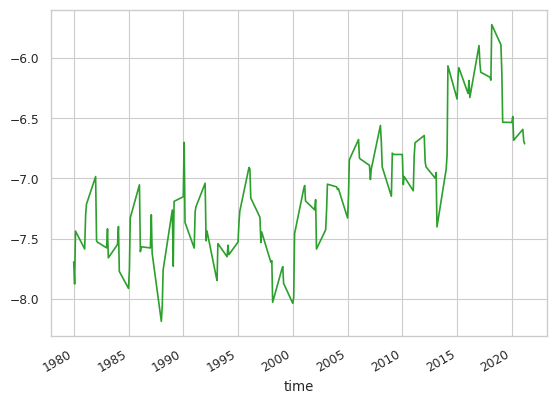

In [30]:
all_data_1m_resampled['temp_anom'].loc[(all_data_1m_resampled['temp_anom'].index.month.isin([12, 1, 2]))].rolling(window=3).mean().dropna().plot( c='C2')


<Axes: xlabel='time'>

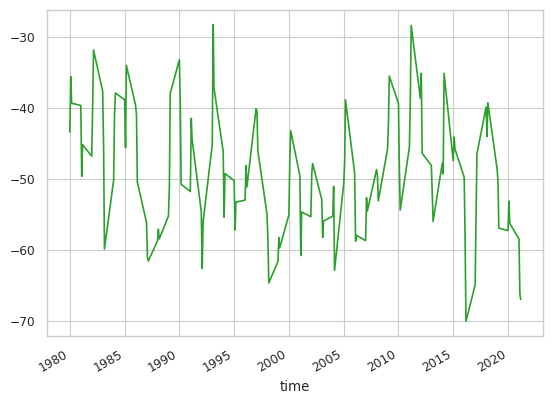

In [31]:
all_data_1m_resampled['msl_hightolow_mean_grad'].loc[(all_data_1m_resampled['msl_hightolow_mean_grad'].index.month.isin([12, 1, 2]))].rolling(window=3).mean().dropna().plot( c='C2')


Text(0.5, 0.94, 'DJF: ERA5')

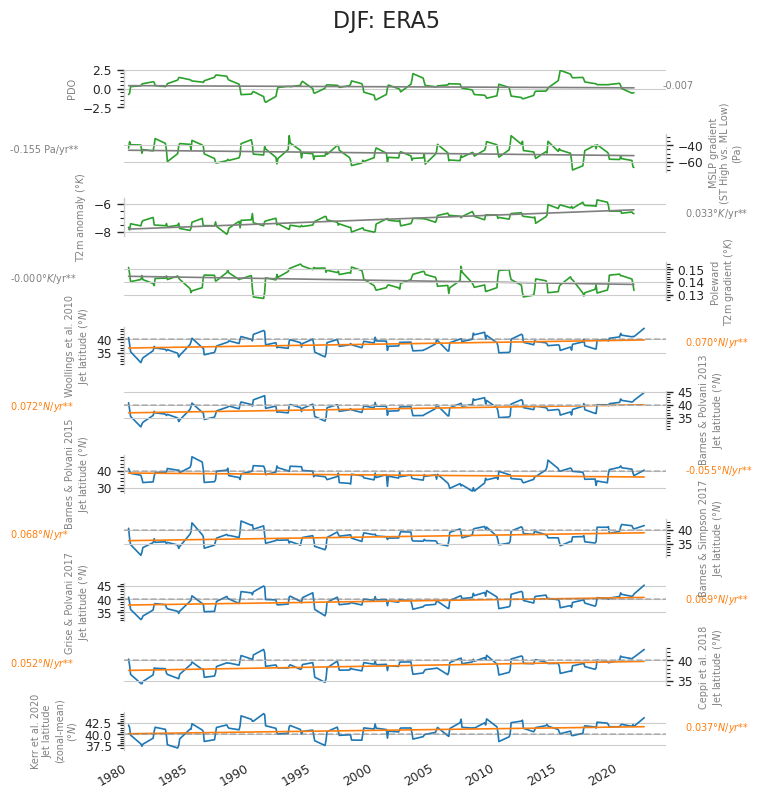

In [32]:
sns.set_style('whitegrid')
sns.set_context('paper')
fig, axes = plt.subplots(11, 1, figsize=(7, 10), sharex=True, \
                         height_ratios=[0.5, 0.5, 0.5,0.5, 0.5, 0.5,0.5, 0.5, 0.5,0.5, 0.5])
# all_data_rolling = all_data.rolling(window=365).mean()
# all_data_rolling_missing_vals = all_data.rolling(window=365, min_periods=8).mean()
# all_data_rolling['temp_anom'] = (all_data_rolling['t2m'] - all_data_rolling['t2m'].mean())
cols_to_plot = ['pdo', 'msl_hightolow_mean_grad', 'temp_anom', 't2m_mean_poleward_grad',\
                'jet_lat_w10', 'jet_lat_bp13', 'jet_lat_bp15', 'jet_lat_bs17',\
                'jet_lat_gp17', 'jet_lat_c18', 'jet_lat_k20']

ylabels = ["PDO", "MSLP gradient\n(ST High vs. ML Low)\n(Pa)", "T2m anomaly (${\degree K}$)", "Poleward\nT2m gradient (${\degree K}$)",\
           "Woollings et al. 2010\nJet latitude (${\degree N}$)",\
           "Barnes & Polvani 2013\nJet latitude (${\degree N}$)",\
           "Barnes & Polvani 2015\nJet latitude (${\degree N}$)",\
           "Barnes & Simpson 2017\nJet latitude (${\degree N}$)",\
           "Grise & Polvani 2017\nJet latitude (${\degree N}$)",\
           "Ceppi et al. 2018\nJet latitude (${\degree N}$)",\
          "Kerr et al. 2020\nJet latitude\n(zonal-mean)\n(${\degree N}$)"]

slope_units = ["", " Pa/yr", "${\degree K}$/yr", "${\degree K}$/yr"]

all_data_1m_resampled['pdo'].loc[(all_data_1m_resampled['pdo'].index.month.isin([12, 1, 2]))].rolling(window=3).mean().plot(ax=axes[0], c='C2')
axes[0].set_ylim(-2.5, 2.5)
axes[0].hlines(0, 100, 648, alpha=.5, color='grey', linestyle='--')
all_data_1m_resampled['msl_hightolow_mean_grad'].loc[(all_data_1m_resampled['msl_hightolow_mean_grad'].index.month.isin([12, 1, 2]))].rolling(window=3).mean().plot(ax=axes[1], c='C2')
all_data_1m_resampled['temp_anom'].loc[(all_data_1m_resampled['temp_anom'].index.month.isin([12, 1, 2]))].rolling(window=3).mean().dropna().plot(ax=axes[2], c='C2')
# axes[2].set_ylim(-1.2, 1.2)
# axes[2].hlines(0, 100, 648, alpha=.5, color='grey', linestyle='--')
all_data_1m_resampled['t2m_mean_poleward_grad'].loc[(all_data_1m_resampled['t2m_mean_poleward_grad'].index.month.isin([12, 1, 2]))].rolling(window=3).mean().plot(ax=axes[3], c='C2')
all_data_1m_resampled['jet_lat_w10'].loc[(all_data_1m_resampled['jet_lat_w10'].index.month.isin([12, 1, 2]))].rolling(window=3).mean().plot(ax=axes[4], c="C0")
all_data_1m_resampled['jet_lat_bp13'].loc[(all_data_1m_resampled['jet_lat_bp13'].index.month.isin([12, 1, 2]))].rolling(window=3).mean().plot(ax=axes[5], c="C0")
all_data_1m_resampled['jet_lat_bp15'].loc[(all_data_1m_resampled['jet_lat_bp15'].index.month.isin([12, 1, 2]))].rolling(window=3).mean().plot(ax=axes[6], c="C0")
all_data_1m_resampled['jet_lat_bs17'].loc[(all_data_1m_resampled['jet_lat_bs17'].index.month.isin([12, 1, 2]))].rolling(window=3).mean().plot(ax=axes[7], c="C0")
all_data_1m_resampled['jet_lat_gp17'].loc[(all_data_1m_resampled['jet_lat_gp17'].index.month.isin([12, 1, 2]))].rolling(window=3).mean().plot(ax=axes[8], c="C0")
all_data_1m_resampled['jet_lat_c18'].loc[(all_data_1m_resampled['jet_lat_c18'].index.month.isin([12, 1, 2]))].rolling(window=3).mean().plot(ax=axes[9], c="C0")
# # axes[9].set_ylim(26, 42)
all_data_1m_resampled['jet_lat_k20'].loc[(all_data_1m_resampled['jet_lat_k20'].index.month.isin([12, 1, 2]))].rolling(window=3).mean().plot(ax=axes[10], c="C0")

counter = 0 
for ax, col_name, ylabel in zip(axes, cols_to_plot, ylabels):
    if counter % 2 == 1:
        twin_ax = ax.twinx()
        twin_ax.set_ylim(ax.get_ylim())
        twin_ax.spines['top'].set_visible(False) 
        twin_ax.spines['bottom'].set_visible(False)
        twin_ax.spines['left'].set_visible(False)
        ax.spines['left'].set_visible(False)
        twin_ax.set_ylabel(ylabel, size=7, color='grey')
        twin_ax.minorticks_on()
        twin_ax.tick_params(axis='y',which='major', right=True)
        twin_ax.tick_params(axis='y',which='minor', right=True)
        twin_ax.hlines(40, 3500, 19641, color='gray', alpha=0.5, linestyle='--')
        ax.set_yticks([])
    else:
        ax.set_ylabel(ylabel, size=7, color='grey'); 
    
    ax.spines['top'].set_visible(False); 
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False); 
    ax.set_title('')
    if col_name in cols_to_plot[:4]:
        color_to_use = 'C7'
        # Work around because first columns are monthly res
        lin_reg_line = get_linear_reg_slope(pd.DataFrame(all_data_1m_resampled[col_name].loc[(all_data_1m_resampled[col_name].index.month.isin([12, 1, 2]))].rolling(window=3).mean().dropna()), col_name)
        lin_reg_line.plot(ax=ax, c=color_to_use, legend=False)
    else:
        color_to_use = 'C1'
        # try:
        #     lin_reg_line = get_linear_reg_slope(all_data_rolling, col_name)
        # except:
        lin_reg_line = get_linear_reg_slope(pd.DataFrame(all_data_1m_resampled[col_name].loc[(all_data_1m_resampled[col_name].index.month.isin([12, 1, 2]))].rolling(window=3).mean().dropna()), col_name)
        lin_reg_line.plot(ax=ax, c='C1', legend=False)
    slope_by_year = (lin_reg_line['reg_line'][-1] - lin_reg_line['reg_line'][0]) / (lin_reg_line.index.year[-1]  - lin_reg_line.index.year[0])
    if counter < 4:
        slope_label = slope_units[counter]
    else:
        slope_label = "${\degree N/yr}$"
        
    ## run Augmented Dickey Fuller
    ADF, pval, _, _, _, _ = adfuller(all_data_1m_resampled[col_name].loc[(all_data_1m_resampled[col_name].index.month.isin([12, 1, 2]))].rolling(window=3).mean().dropna())

    if pval >= 0.05:
        slope_label += "*"
    if pval >= 0.01:
        slope_label += "*"
    else:
        pass
    if counter % 2 == 1:
        ymin, ymax = twin_ax.get_ylim()
        twin_ax.text(s=f"{slope_by_year:.3f}{slope_label}", x=twin_ax.get_xlim()[0]+1000, y=(ymin + ymax)/2, fontsize=7, c=color_to_use)
    else:
        ymin, ymax = ax.get_ylim()
        ax.text(s=f"{slope_by_year:.3f}{slope_label}", x=ax.get_xlim()[-1]-400, y=(ymin + ymax)/2, fontsize=7, c=color_to_use)
        
    ax.grid(axis='x')
    ax.minorticks_on()
    ax.tick_params(axis='y',which='major', left=True)
    ax.tick_params(axis='y',which='minor', left=True)
    counter += 1


for n in range(4, 12):
    if n % 2 != 1:
        axes[n].hlines(40, 3500, 19641, color='gray', alpha=0.5, linestyle='--')

# print(axes[0].get_xlim())
for ax in axes:
    ax.set_xlim(3500, 19641)
    
axes[-1].set_xlabel("")
fig.subplots_adjust(hspace=0.7)
plt.suptitle('DJF: ERA5', y=0.94, size=16)
# fig.savefig('figures/figure_1_DJF.png', dpi=300, bbox_inches='tight', transparent=False)